In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("/content/drive/MyDrive/Grad_data.csv")
df.head()

,gid,src_state,source_url,observationuri,temp_c,temp_type,depth_m,depth_type,well_name,name_src,lat_wgs84,lon_wgs84,state,county,grad
0,1,TX,http://services.azgs.az.gov/ArcGIS/services/aa...,http://resources.usgin.org/uri-gin/tbeg/bhtemp...,142,measured,4193.4384,driller total,4242732762,apino,26.98900,-99.16300,TX,Zapata,30.285410
1,2,TX,http://services.azgs.az.gov/ArcGIS/services/aa...,http://resources.usgin.org/uri-gin/tbeg/bhtemp...,68,measured,2405.4816,measured,4.20E+13,apino,32.75492,-101.29642,TX,Borden,22.033010
2,3,TX,http://services.azgs.az.gov/ArcGIS/services/aa...,http://resources.usgin.org/uri-gin/tbeg/bhtemp...,147,measured,3489.0456,driller total,4250533301,apino,26.98900,-99.16300,TX,Zapata,37.832696
3,6,AL,http://kgs.uky.edu/arcgis/services/aasggeother...,http://resources.usgin.org/uri-gin/algs/bhtemp...,33,measured,858.0120,driller total,1.13E+12,apino,33.26590,-87.33860,AL,Tuscaloosa,20.978728
4,9,AL,http://kgs.uky.edu/arcgis/services/aasggeother...,http://resources.usgin.org/uri-gin/algs/bhtemp...,42,measured,1387.7544,driller total,1.13E+12,apino,33.47197,-87.38047,AL,Tuscaloosa,19.455892


In [3]:
mean_value = df['depth_m'].mean()
df['depth_m'] = df['depth_m'].fillna(mean_value)

In [4]:
mean_values = df['temp_c'].mean()
df['temp_c'] = df['temp_c'].fillna(mean_values)

In [28]:
drop_cols = ['gid', 'src_state', 'source_url', 'observationuri', 'temp_type','depth_type', 'well_name', 'name_src', 'county','state','grad']
new_data = df.drop(drop_cols, axis =1)
new_data.head()

,temp_c,depth_m,lat_wgs84,lon_wgs84
0,142,4193.4384,26.98900,-99.16300
1,68,2405.4816,32.75492,-101.29642
2,147,3489.0456,26.98900,-99.16300
3,33,858.0120,33.26590,-87.33860
4,42,1387.7544,33.47197,-87.38047


In [29]:
new_data.describe()

,temp_c,depth_m,lat_wgs84,lon_wgs84
count,12028.000000,12028.000000,12028.000000,12028.000000
mean,67.717243,1913.076879,37.283332,-102.392728
std,29.333430,1068.270799,6.066705,12.207062
min,17.000000,71.000000,26.989000,-163.915590
25%,42.000000,1017.422400,33.392888,-108.460662
50%,61.000000,1787.956800,37.100389,-107.736194
75%,90.000000,2502.408000,39.684826,-88.010225
max,204.000000,6601.968000,71.282020,-85.177358


In [30]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12028 entries, 0 to 12027
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   temp_c     12028 non-null  int64  
 1   depth_m    12028 non-null  float64
 2   lat_wgs84  12028 non-null  float64
 3   lon_wgs84  12028 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 376.0 KB


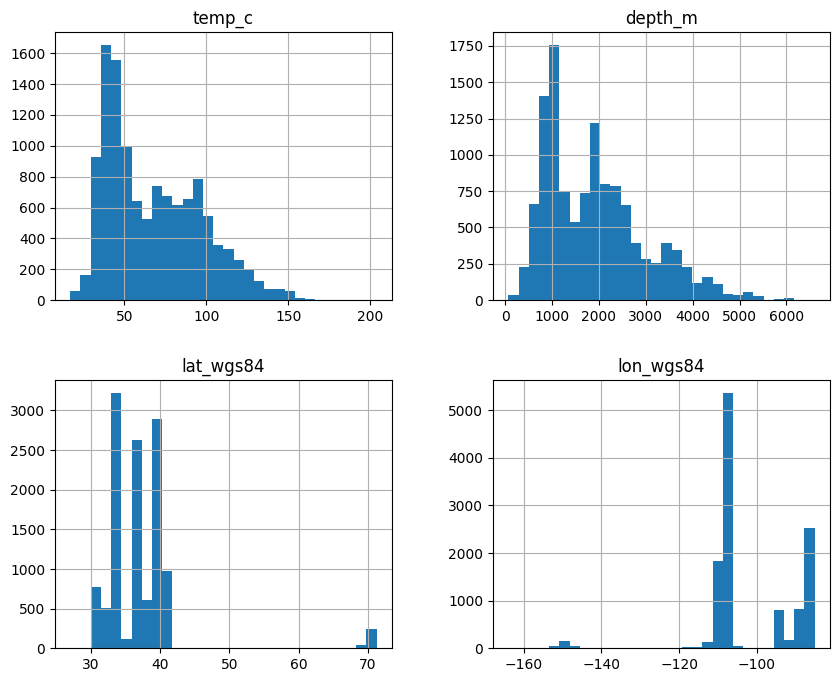

In [31]:
new_data.hist(bins=30, figsize =(10,8))
plt.show()

In [32]:
col = ['temp_c']
X = new_data.drop(col, axis=1)
target = 'temp_c'
y = new_data['temp_c']
X

,depth_m,lat_wgs84,lon_wgs84
0,4193.4384,26.989000,-99.163000
1,2405.4816,32.754920,-101.296420
2,3489.0456,26.989000,-99.163000
3,858.0120,33.265900,-87.338600
4,1387.7544,33.471970,-87.380470
...,...,...,...
12023,2150.6688,39.503237,-108.136174
12024,2161.3368,39.503149,-108.136062
12025,2289.9624,39.501411,-107.938385
12026,2490.8256,39.501367,-107.938334


In [33]:
y

0        142
1         68
2        147
3         33
4         42
        ... 
12023     67
12024     78
12025     98
12026    108
12027     54
Name: temp_c, Length: 12028, dtype: int64

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

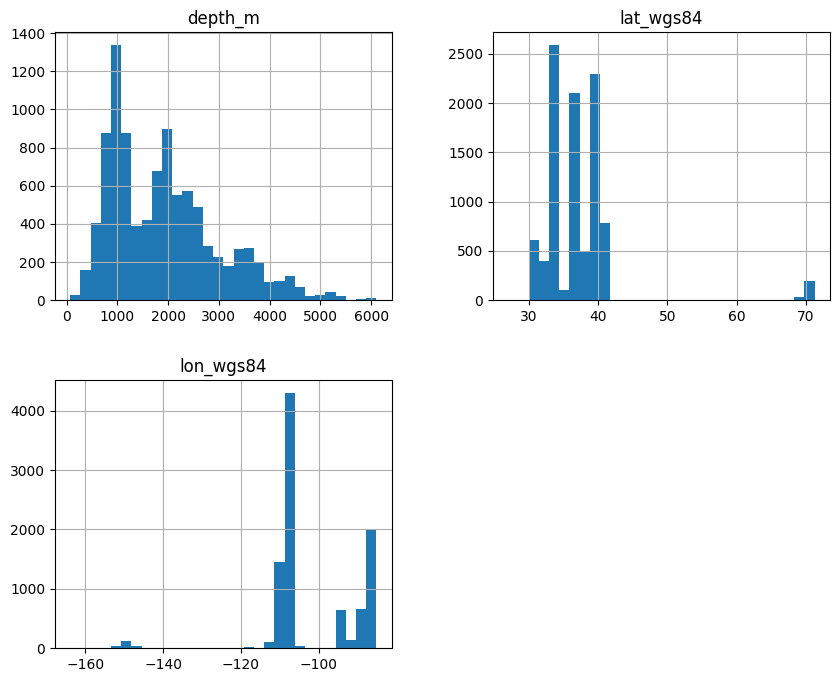

In [35]:
X_train.hist(bins=30, figsize =(10,8))
plt.show()

In [36]:

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

X_train_s = sc.fit_transform(X_train)
X_test_s = sc.transform(X_test)



In [37]:
X_train_s

array([[0.43757117, 0.28330968, 0.71173943],
       [0.38145456, 0.28218515, 0.71065547],
       [0.15648302, 0.2274925 , 0.71429684],
       ...,
       [0.16906001, 0.22750424, 0.71634827],
       [0.57460479, 0.09782826, 0.97908489],
       [0.16804981, 0.14059777, 0.9682685 ]])

In [38]:
X_train_s.shape

(9622, 3)

In [39]:
from sklearn.neural_network import MLPRegressor

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
param_grid = {'batch_size':[64,32,20,10],
              'learning_rate_init':[0.0001,0.001,0.1],
              'max_iter':[1000,10000]}

In [42]:
mlp_regressor = MLPRegressor(
    hidden_layer_sizes=(512,256,128,64),
    activation='relu',
    solver='sgd',
    learning_rate='adaptive',
    batch_size=64,
    learning_rate_init=0.0001,
    max_iter=2000,
    random_state=101,
    validation_fraction= 0.2

)


In [43]:
grid = GridSearchCV(estimator=mlp_regressor, param_grid= param_grid)

In [44]:
history = mlp_regressor.fit(X_train_s, y_train)

In [45]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
preds = mlp_regressor.predict(X_test_s)
mse = mean_squared_error(y_test, preds)
mae = mean_absolute_error(y_test,preds)
mae

5.435204990859743

In [46]:
mse

57.16956916000672

In [47]:
mape = mean_absolute_percentage_error(y_test,preds)
mape

0.08336512460339143

In [48]:
history.predict(X_test_s)

array([ 37.41894818,  48.20911122,  89.18112309, ..., 109.50293883,
        99.45040162,  66.18161777])

In [49]:
r2_score (y_test,preds)

0.9343100658493892

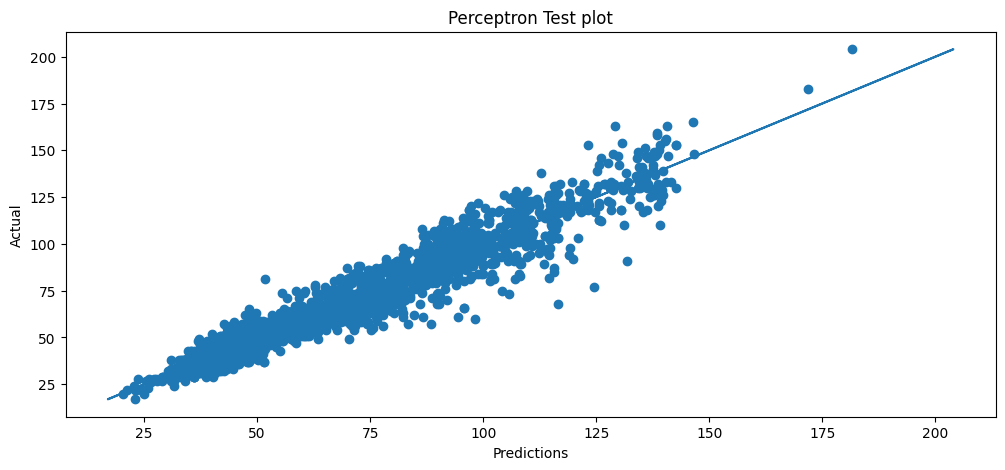

In [50]:
fig, ax = plt.subplots(1,1, figsize=(12, 5))
plt.plot(y_test, y_test)
plt.scatter(preds, y_test)
plt.xlabel("Predictions")
plt.ylabel("Actual")
plt.title("Perceptron Test plot")
plt.savefig("test plot.jpg", bbox_inches="tight")

In [51]:
new_preds = mlp_regressor.predict(X_train_s)
r2_score(y_train,new_preds)

0.9316363343389826

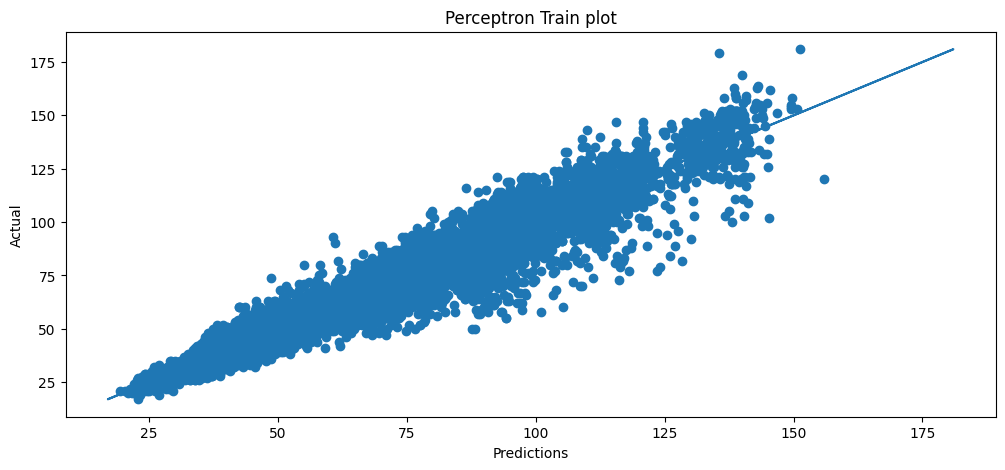

In [52]:
fig, ax = plt.subplots(1,1, figsize=(12, 5))
plt.plot(y_train, y_train)
plt.scatter(new_preds, y_train)
plt.xlabel("Predictions")
plt.ylabel("Actual")
plt.title("Perceptron Train plot")
plt.savefig("test plot.jpg", bbox_inches="tight")

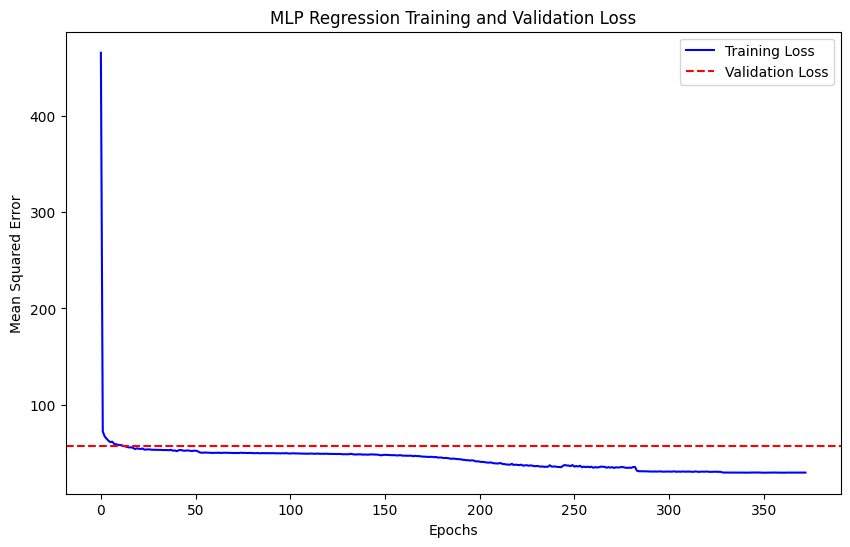

In [54]:
plt.figure(figsize=(10, 6))
plt.plot(mlp_regressor.loss_curve_, label='Training Loss', color='blue')
plt.axhline(y=mse, color='red', linestyle='--', label='Validation Loss')
plt.title('MLP Regression Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

In [56]:
X_test

,depth_m,lat_wgs84,lon_wgs84
2075,893.6736,33.872356,-87.937436
11695,1009.4976,39.727931,-108.804174
9349,2429.2560,39.891335,-108.262174
10181,1898.5992,40.746570,-106.189509
2738,1042.4160,33.180550,-87.377270
...,...,...,...
8479,1895.8560,40.137370,-108.897393
2177,648.9192,33.881815,-87.763921
783,4344.6192,31.278211,-87.457135
1214,3925.2144,31.320119,-87.229128


In [57]:
X_test['temp_c'] = preds
combined = X_test
combined

,depth_m,lat_wgs84,lon_wgs84,temp_c
2075,893.6736,33.872356,-87.937436,37.418948
11695,1009.4976,39.727931,-108.804174,48.209111
9349,2429.2560,39.891335,-108.262174,89.181123
10181,1898.5992,40.746570,-106.189509,66.082080
2738,1042.4160,33.180550,-87.377270,39.438918
...,...,...,...,...
8479,1895.8560,40.137370,-108.897393,70.288135
2177,648.9192,33.881815,-87.763921,34.432701
783,4344.6192,31.278211,-87.457135,109.502939
1214,3925.2144,31.320119,-87.229128,99.450402


In [58]:
X_test['temp_c'] = y_test
combined_1 = X_test
combined_1

,depth_m,lat_wgs84,lon_wgs84,temp_c
2075,893.6736,33.872356,-87.937436,38
11695,1009.4976,39.727931,-108.804174,48
9349,2429.2560,39.891335,-108.262174,107
10181,1898.5992,40.746570,-106.189509,71
2738,1042.4160,33.180550,-87.377270,41
...,...,...,...,...
8479,1895.8560,40.137370,-108.897393,78
2177,648.9192,33.881815,-87.763921,38
783,4344.6192,31.278211,-87.457135,103
1214,3925.2144,31.320119,-87.229128,100


In [59]:
import folium

In [68]:
import folium
import pandas as pd



def get_color(temp_c):
    if temp_c >= 150:
        return 'red'
    elif temp_c >= 100:
        return 'yellow'
    else:
        return 'green'


m = folium.Map(location=[combined['lat_wgs84'].mean(), combined['lon_wgs84'].mean()], zoom_start=6)

for index, row in new_data.iterrows():
    color = get_color(row['temp_c'])
    folium.CircleMarker(
        location=[row['lat_wgs84'], row['lon_wgs84']],
        radius=5,
        color=color,
        fill=True,
        fill_opacity=0.6,
        popup=f'temp_c: {row["temp_c"]:.2f}',
    ).add_to(m)

legend_html = '''
     <div style="position: fixed;
                 bottom: 50px; left: 50px; width: 120px; height: 150px;
                 background-color: rgba(255, 255, 255, 0.5);
                 border-radius: 5px;
                 z-index:1000;
                 padding: 10px;
                 ">
     <p><strong>Temperature Legend in Celsius</strong></p>
     <p><span style="background-color: green; opacity: 0.4; padding: 5px; border-radius: 3px;"></span> 0-99</p>
     <p><span style="background-color: yellow; opacity: 0.65; padding: 5px; border-radius: 3px;"></span> 100-150</p>
     <p><span style="background-color: red; opacity: 1; padding: 5px; border-radius: 3px;"></span> 150+</p>
     </div>
     '''

m.get_root().html.add_child(folium.Element(legend_html))

m.save('concentration_map.html')


In [69]:
m

Output hidden; open in https://colab.research.google.com to view.

In [66]:
import folium
import pandas as pd



def get_color(temp_c):
    if temp_c >= 150:
        return 'red'
    elif temp_c >= 100:
        return 'yellow'
    else:
        return 'green'


y = folium.Map(location=[combined_1['lat_wgs84'].mean(), combined_1['lon_wgs84'].mean()], zoom_start=6)

for index, row in new_data.iterrows():
    color = get_color(row['temp_c'])
    folium.CircleMarker(
        location=[row['lat_wgs84'], row['lon_wgs84']],
        radius=5,
        color=color,
        fill=True,
        fill_opacity=0.6,
        popup=f'temp_c: {row["temp_c"]:.2f}',
    ).add_to(y)

legend_html = '''
     <div style="position: fixed;
                 bottom: 50px; left: 50px; width: 120px; height: 150px;
                 background-color: rgba(255, 255, 255, 0.5);
                 border-radius: 5px;
                 z-index:1000;
                 padding: 10px;
                 ">
     <p><strong>Temperature Legend in Celsius</strong></p>
     <p><span style="background-color: green; opacity: 0.4; padding: 5px; border-radius: 3px;"></span> 0-99</p>
     <p><span style="background-color: yellow; opacity: 0.65; padding: 5px; border-radius: 3px;"></span> 100-150</p>
     <p><span style="background-color: red; opacity: 1; padding: 5px; border-radius: 3px;"></span> 150+</p>
     </div>
     '''

y.get_root().html.add_child(folium.Element(legend_html))

y.save('concentration_map.html')

In [67]:
y

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import joblib
model_filename = "model.joblib"
joblib.dump(history, 'model_filename')

['model_filename']

In [ ]:
example_scaler = joblib.dump(sc, "scaler.pkl")

In [ ]:
example_scalers = joblib.load("scaler.pkl")

In [ ]:
loaded_model = joblib.load('model_filename')

In [ ]:
X_test.head(1)

,depth_m,lat_wgs84,lon_wgs84,temp_c
7568,1894.9416,37.164032,-82.38529,47.0


In [ ]:
input_data = {"depth_m":184.9416,
           "lat_wgs84":3.64032,
           "lon_wgs84":-82.38529}

In [ ]:
def return_prediction(history,sc,sample_json):
  input_depth = sample_json['depth_m']
  input_lat = sample_json['lat_wgs84']
  input_lon = sample_json['lon_wgs84']

  temp_pred = [[input_depth,input_lat,input_lon]]
  temp_pred_1 = sc.fit_transform(temp_pred)



  temp_preds = history.predict(temp_pred_1)

  return temp_preds


In [ ]:
return_prediction(loaded_model, example_scalers, example)

array([67.7104414])